Project 1: What factors have contributed to the spread of COVID-19 in different regions of the world

In [265]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
import json 
import time

In [330]:
# Retrieve Datasets

path_covid_country = r"Dataset\Covid\country_wise_latest.csv"
path_covid_complete = r"Dataset\Covid\covid_19_clean_complete.csv"
path_air_quality = r"Dataset\Air Quality\World_cities_air_quality_and_water_pollution_2020.csv"
path_air_pollution=r"Dataset\Air Quality\World_most_polluted_countries_regions_historical_data _2018-2021.csv"
path_government_resp = r"Dataset\Government_response\COVID_gov_complete_29_03.csv"
path_vaccination_cases = r"Dataset\Vaccination\df_covid19_countries_cases.csv"
path_vaccination_rate = r"Dataset\Vaccination\df_covid19_countries_vaccination.csv"
path_weather = r"Dataset\Weather\training_data_with_weather_info_week_4.csv"


covid_country_df = pd.read_csv(path_covid_country)
covid_complete_df = pd.read_csv(path_covid_complete)
air_quality_df = pd.read_csv(path_air_quality)
air_pollution_df=pd.read_csv(path_air_pollution,index_col=0)
government_resp_df = pd.read_csv(path_government_resp)
vaccination_cases_df = pd.read_csv(path_vaccination_cases)
vaccination_rate_df = pd.read_csv(path_vaccination_rate)
weather_df = pd.read_csv(path_weather)

Factor 1: Impact of climate on the spread of Covid-19 (Kevin Guillemette)

Factor 2: Impact of Government Response on the spread of Covid-19 (Helena Fedorenko)

Factor 3: Impact of Vaccination Rate on the spread & severity of Covid-19 (Brecht Nys)

In [247]:
# Merge two datasets

vaccination_df = pd.merge(vaccination_cases_df, vaccination_rate_df,on=["location", "date"])

# Remove unnecessary columns

vaccination_df = vaccination_df[["location",
                                 "date",
                                 "total_cases",
                                 "total_deaths",
                                 "new_deaths",
                                 "reproduction_rate",
                                 "people_vaccinated",
                                 "people_fully_vaccinated",
                                 "population"]]

- reproduction_rate
    The R number is a way of rating coronavirus or any disease's ability to spread.
    R is the number of people that one infected person will pass on a virus to, on average.
    If the R value is higher than one, then the number of cases keeps increasing.
- people_vaccinated: at least 1 vaccination
- people_fully_vaccinate: all required vaccinations
- vaccination_ratio: people_vaccinated / population


In [248]:
# Add necessary columns

vaccination_rate = []
fully_vaccination_rate = []
death_rate = []

for index, row in vaccination_df.iterrows():
    current_population = row["population"]
    current_vaccinated = row["people_vaccinated"]
    current__fully_vaccinated = row["people_fully_vaccinated"]
    current_total_cases = row["total_cases"]
    current_new_deaths = row["total_deaths"]
        
    vaccination_rate.append((current_vaccinated/current_population)*100)
    fully_vaccination_rate.append((current__fully_vaccinated/current_population)*100)
    if current_total_cases == 0:
        death_rate.append(0)
    else:
        death_rate.append((current_new_deaths/current_total_cases)*100)
    
vaccination_df["Vaccination Rate"] = vaccination_rate
vaccination_df["Fully Vaccinated Rate"] = fully_vaccination_rate
vaccination_df["Death Rate"] = death_rate


In [251]:
# Map Country to Continent

country_names = vaccination_df["location"].unique()
continent_name = [ ]

for country in country_names[:5]:
    country_url = "https://restcountries.com/v3.1/name/"
    response = requests.get(country_url + country).json()

    try:
        continent = response[0]["region"]
    except:
        continent = "Unknown"
    continent_name.append(continent)
    time.sleep(0.5)
    
country_mapping_df = pd.DataFrame({"location": country_names,
                                   "Continent": continent_name})

vaccination_df = pd.merge(vaccination_df, country_mapping_df,on="location")


ConnectionError: HTTPSConnectionPool(host='restcountries.com', port=443): Max retries exceeded with url: /v3.1/name/Afghanistan (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025E5724B070>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
country_mapping_df

,location,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
231,Wallis and Futuna,Oceania
232,Western Sahara,Africa
233,Yemen,Asia
234,Zambia,Africa


The r-value for vaccination rate vs reproduction rate is: 0.02541201294849562
The r-value for fully vaccinated rate vs reproduction rate is: 0.050563762890705535


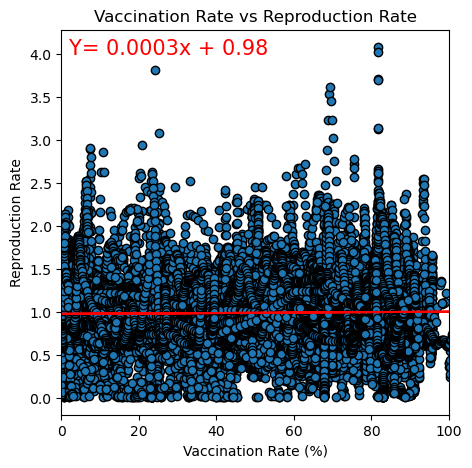

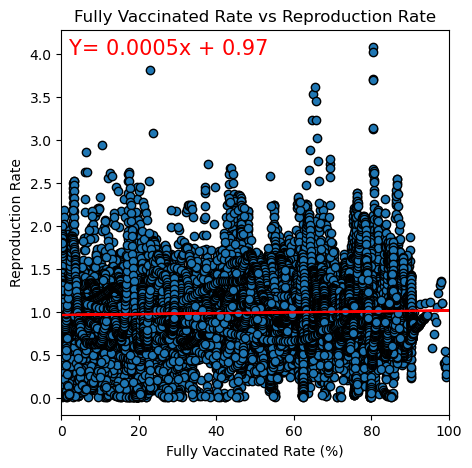

In [ ]:
# Analyse connection between Vaccination Rate & Reproduction Rate

## Clean Dataset
### Remove all rows for which we do not have a Reproduction Rate

vaccination_reproduction_df = vaccination_df.drop(vaccination_df[vaccination_df["reproduction_rate"] <= 0].index)

### Remove all rows for which we do not have any vaccinated people

vaccination_reproduction_df = vaccination_reproduction_df.drop(vaccination_reproduction_df[vaccination_reproduction_df["people_vaccinated"] == 0].index)

## Scatter plot + linear regression for vaccination rate vs. reproduction rate

x_axis = vaccination_reproduction_df["Vaccination Rate"]
y_axis = vaccination_reproduction_df["reproduction_rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Reproduction Rate")
plt.title("Vaccination Rate vs Reproduction Rate")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs reproduction rate is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(2,4),fontsize = 15, color = "red")
plt.savefig("Result\Vaccination Rate vs Reproduction Rate.png")


## Scatter plot + linear regression for full vaccination rate vs. reproduction rate

fully_vaccination_reproduction_df = vaccination_reproduction_df.drop(vaccination_reproduction_df[vaccination_reproduction_df["people_fully_vaccinated"] == 0].index)

x_axis = fully_vaccination_reproduction_df["Fully Vaccinated Rate"]
y_axis = fully_vaccination_reproduction_df["reproduction_rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Fully Vaccinated Rate (%)")
plt.ylabel("Reproduction Rate")
plt.title("Fully Vaccinated Rate vs Reproduction Rate")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for fully vaccinated rate vs reproduction rate is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(2,4),fontsize = 15, color = "red")
plt.savefig("Result\Fully Vaccinated Rate vs Reproduction Rate.png")



The r-value for vaccination rate vs death rate is: -0.3236041007059781
The r-value for fully vaccinated rate vs death rate is: -0.3593424696481669


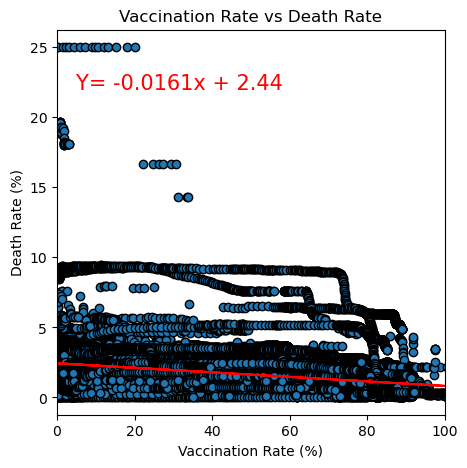

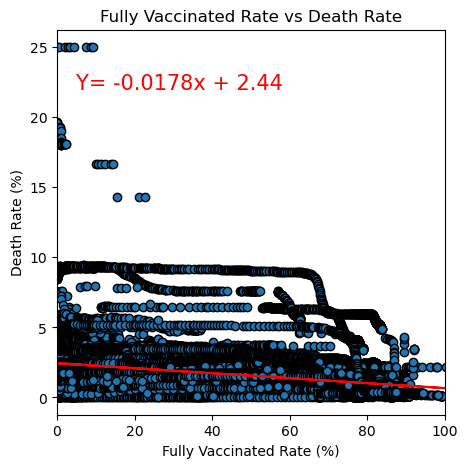

In [ ]:
# Analyse connection between Vaccination Rate & Death Rate

## Clean Dataset
### Remove all rows for which we do not have a Death Rate

vaccination_death_df = vaccination_df.drop(vaccination_df[vaccination_df["Death Rate"] == 0].index)

### Remove all rows for which we do not have any vaccinated people

vaccination_death_df = vaccination_death_df.drop(vaccination_death_df[vaccination_death_df["people_vaccinated"] == 0].index)


## Scatter plot + linear regression for vaccination rate vs. reproduction rate

x_axis = vaccination_death_df["Vaccination Rate"]
y_axis = vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Vaccination Rate vs Death Rate")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs death rate is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(5,22),fontsize = 15, color = "red")
plt.savefig("Result\Vaccination Rate vs Death Rate.png")

## Scatter plot + linear regression for fully vaccinated rate vs. reproduction rate

fully_vaccination_death_df = vaccination_death_df.drop(vaccination_death_df[vaccination_death_df["people_fully_vaccinated"] == 0].index)

x_axis = fully_vaccination_death_df["Fully Vaccinated Rate"]
y_axis = fully_vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Fully Vaccinated Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Fully Vaccinated Rate vs Death Rate")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for fully vaccinated rate vs death rate is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(5,22),fontsize = 15, color = "red")
plt.savefig("Result\Fully Vaccinated Rate vs Death Rate.png")


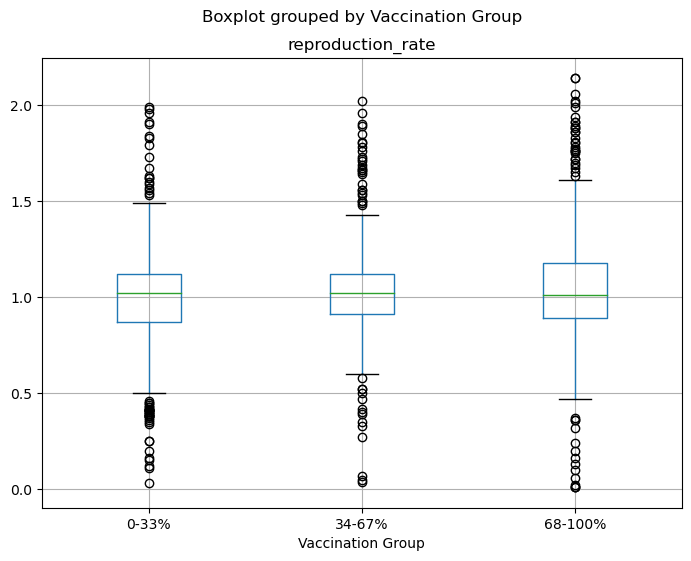

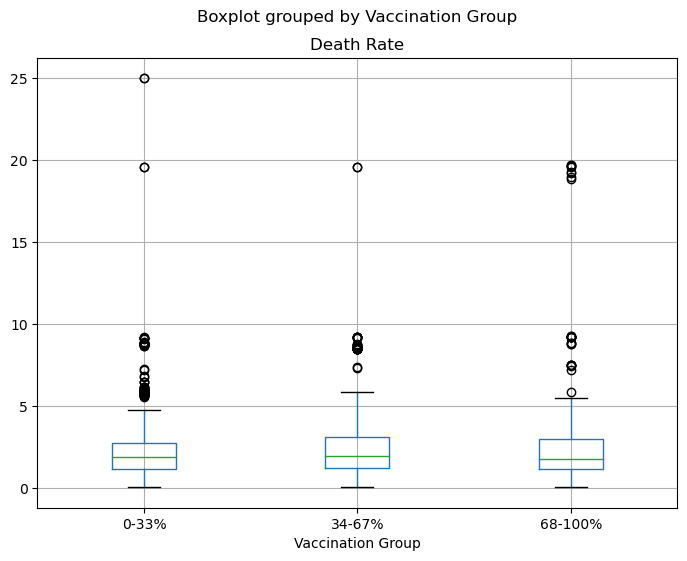

In [ ]:
# Analyse connection based on bins

## Add Bins to the data

bins = [0, 0.3333, 0.666, 1]
name_bins = ["0-33%", "34-67%", "68-100%"]

## Vaccination Rate vs Reproduction Rate

vaccination_reproduction_df["Vaccination Group"] = pd.cut(vaccination_reproduction_df["Vaccination Rate"], bins, labels= name_bins, include_lowest=True)

vaccination_reproduction_df.boxplot("reproduction_rate", by="Vaccination Group", figsize=(8, 6))
plt.savefig("Result\Boxplot vaccination rate vs reproduction rate.png")

### Vaccination Rate vs Death Rate

vaccination_death_df["Vaccination Group"] = pd.cut(vaccination_death_df["Vaccination Rate"], bins, labels= name_bins, include_lowest=True)
vaccination_death_df.boxplot("Death Rate", by="Vaccination Group", figsize=(8, 6))
plt.savefig("Result\Boxplot vaccination rate vs death rate.png")



The r-value for vaccination rate vs death rate in Asia is: -0.27592009813663193
The r-value for vaccination rate vs death rate in Europe is: -0.5642277590356822
The r-value for vaccination rate vs death rate in Americas is: -0.2775634285064898


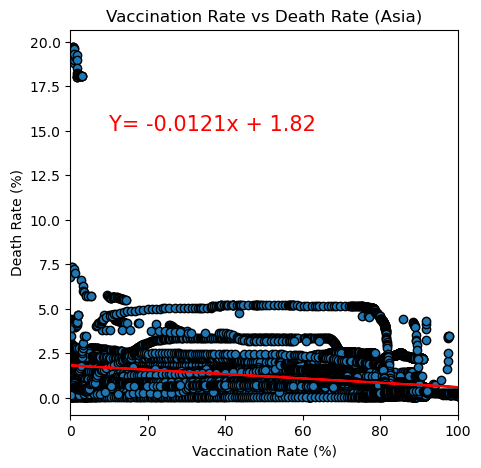

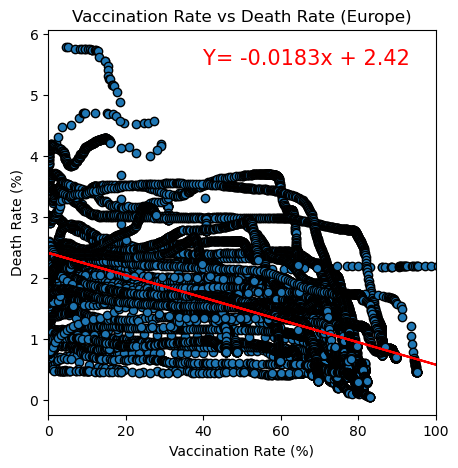

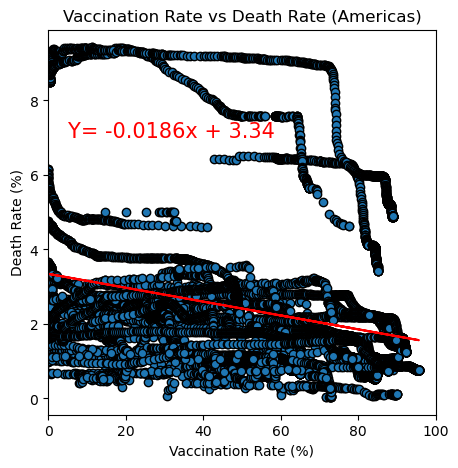

In [ ]:
# Split across continents

## Asia

continent_vaccination_death_df = vaccination_death_df.loc[vaccination_death_df["Continent"] == "Asia",:]

### Add Scatter Plot

x_axis = continent_vaccination_death_df["Vaccination Rate"]
y_axis = continent_vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Vaccination Rate vs Death Rate (Asia)")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

### Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs death rate in Asia is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(10,15),fontsize = 15, color = "red")
plt.savefig("Result\Vaccination Rate vs Death Rate (Asia).png")


## Europe

continent_vaccination_death_df = vaccination_death_df.loc[vaccination_death_df["Continent"] == "Europe",:]

### Add Scatter Plot

x_axis = continent_vaccination_death_df["Vaccination Rate"]
y_axis = continent_vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Vaccination Rate vs Death Rate (Europe)")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

### Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs death rate in Europe is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(40,5.5),fontsize = 15, color = "red")
plt.savefig("Vaccination Rate vs Death Rate (Europe).png")


## Americas

continent_vaccination_death_df = vaccination_death_df.loc[vaccination_death_df["Continent"] == "Americas",:]

### Add Scatter Plot

x_axis = continent_vaccination_death_df["Vaccination Rate"]
y_axis = continent_vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Vaccination Rate vs Death Rate (Americas)")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

### Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs death rate in Americas is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(5,7),fontsize = 15, color = "red")
plt.savefig("Vaccination Rate vs Death Rate (Americas).png")



Factor 4: Impact of Air Pollution Rate on the spread of Covid-19 (Xing Ying Chen)

1. World Most Polluted Countries Vs. Covid Data

In [267]:
### Merge and reset datasets

air_pollution_df=pd.merge(air_pollution_df,covid_country_df,on="Country/Region",how="inner")

air_pollution_df=air_pollution_df.rename(columns={"Rank":"Pollution Rank",
                                 "2021":"2021 Pollution Rate",
                                "2020":"2020 Pollution Rate",
                                "2019":"2019 Pollution Rate",
                                "2018":"2018 Pollution Rate",
                                "Confirmed":"Confirmed_Covid_Cases",
                                "Death":"Death_Covid_Cases",
                                "Recovered":"Recovered_Covid_Cases"})

air_pollution_df['2020 Pollution Rate']=air_pollution_df['2020 Pollution Rate'].replace('-',np.nan)
air_pollution_df['2019 Pollution Rate']=air_pollution_df['2019 Pollution Rate'].replace('-',np.nan)
air_pollution_df['2018 Pollution Rate']=air_pollution_df['2018 Pollution Rate'].replace('-',np.nan)

air_pollution_df['2020 Pollution Rate']=air_pollution_df['2020 Pollution Rate'].astype(float)
air_pollution_df['2019 Pollution Rate']=air_pollution_df['2019 Pollution Rate'].astype(float)
air_pollution_df['2018 Pollution Rate']=air_pollution_df['2018 Pollution Rate'].astype(float)

air_pollution_df[['2018 Pollution Rate', '2019 Pollution Rate', '2020 Pollution Rate', '2021 Pollution Rate']].ffill(axis=0,inplace=True)
air_pollution_df['Average Pollution Rate'] = air_pollution_df[['2018 Pollution Rate', '2019 Pollution Rate', '2020 Pollution Rate', '2021 Pollution Rate']].mean(axis=1)

covid_air_pollution_df=air_pollution_df[["Pollution Rank",
                                         "Country/Region",
                                         "Population",
                                         "Confirmed_Covid_Cases",
                                         "Deaths",
                                         "Recovered_Covid_Cases",
                                         "Average Pollution Rate",
                                         ]]
covid_air_pollution_df

C:\Users\19178\AppData\Local\Temp\ipykernel_19584\657231972.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_pollution_df[['2018 Pollution Rate', '2019 Pollution Rate', '2020 Pollution Rate', '2021 Pollution Rate']].ffill(axis=0,inplace=True)


,Pollution Rank,Country/Region,Population,Confirmed_Covid_Cases,Deaths,Recovered_Covid_Cases,Average Pollution Rate
0,1,Bangladesh,164689383,226225,2965,125683,83.600
1,2,Chad,16425859,922,75,810,75.900
2,3,Pakistan,220892331,274289,5842,241026,66.475
3,4,Tajikistan,9537642,7235,60,6028,45.150
4,5,India,1380004385,1480073,33408,951166,60.150
...,...,...,...,...,...,...,...
99,108,Estonia,1326539,2034,69,1923,6.300
100,109,Australia,25499881,15303,167,9311,7.025
101,110,Bahamas,393248,382,11,91,5.500
102,111,Grenada,112519,23,0,23,5.500


The r-value for vaccination rate vs death rate is: -0.059108490537180515
The r-value for vaccination rate vs death rate is: 0.07160533012632572
The r-value for vaccination rate vs death rate is: -0.0814652341920335


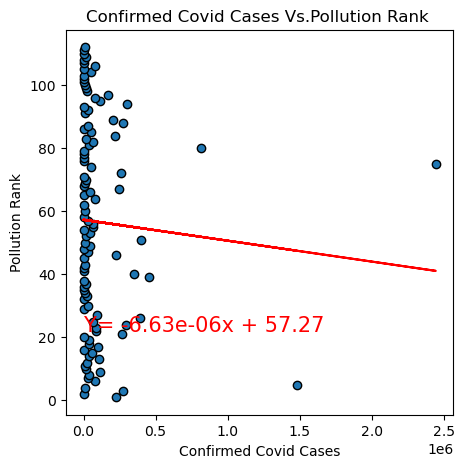

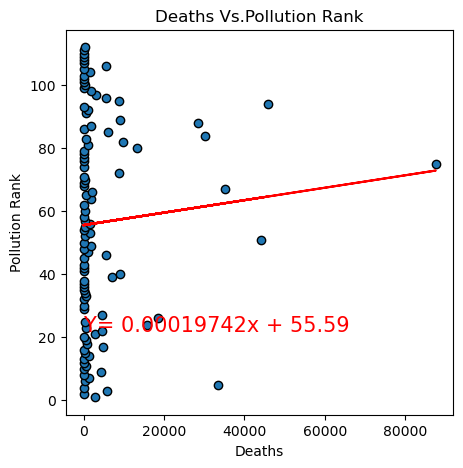

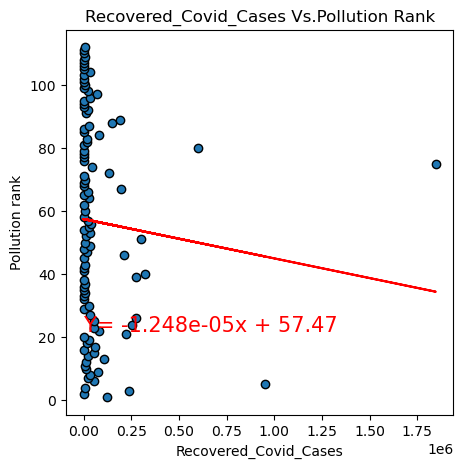

In [278]:
# Scatter plot + linear regression    

##Scatter plot function

def Linear_R_plot(data_x, data_y, title, xlabel, ylabel, filename):
    plt.figure(figsize=(5,5))
    plt.tight_layout()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #plt.xlim(0, 100)

    plt.scatter(data_x,data_y,marker="o",edgecolors="black")

    ## Add linear regression

    (slope, intercept, rvalues, pvalue, stderr) = st.linregress(data_x, data_y)
    regress_values = data_x * slope + intercept
    line_eq = "Y= " + str(round(slope,8)) + "x + " + str(round(intercept,2))
    print("The r-value for vaccination rate vs death rate is: " + str(rvalues))
    plt.plot(data_x, regress_values, "r-")
    plt.annotate(line_eq, xy=(5,22),fontsize = 15, color = "red")
    plt.savefig(filename)

## Scatter plot for Confirmed Covid Cases Vs.Pollution Rank

Linear_R_plot(covid_air_pollution_df["Confirmed_Covid_Cases"],
              covid_air_pollution_df["Pollution Rank"],
              "Confirmed Covid Cases Vs.Pollution Rank ",
              "Confirmed Covid Cases",
              "Pollution Rank",
              "Confirmed Covid Cases Vs.Pollution Rank.png")

## Scatter plot for Deaths Vs.Pollution Rank

Linear_R_plot(covid_air_pollution_df["Deaths"],
              covid_air_pollution_df["Pollution Rank"],
              "Deaths Vs.Pollution Rank",
              "Deaths",
              "Pollution Rank",
              "Deaths Vs.Pollution rank.png")

## Scatter plot for Recovered Covid Cases Vs.Pollution Rank

Linear_R_plot(covid_air_pollution_df["Recovered_Covid_Cases"],
              covid_air_pollution_df["Pollution Rank"],
              "Recovered_Covid_Cases Vs.Pollution Rank",
              "Recovered_Covid_Cases",
              "Pollution rank",
              "Recovered_Covid_Cases Vs.Pollution Rank.png")


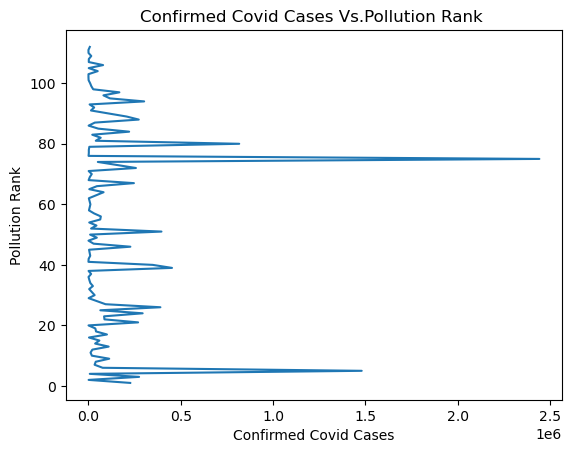

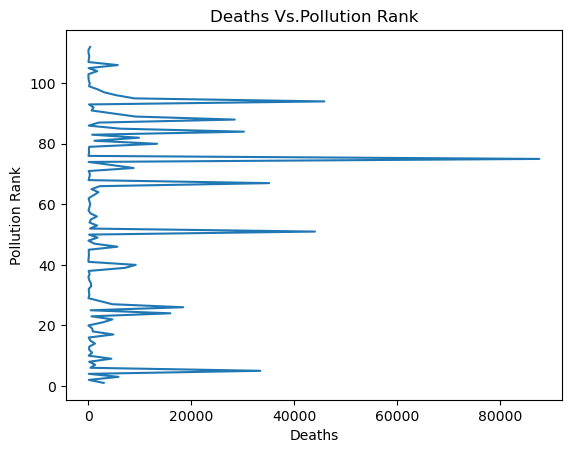

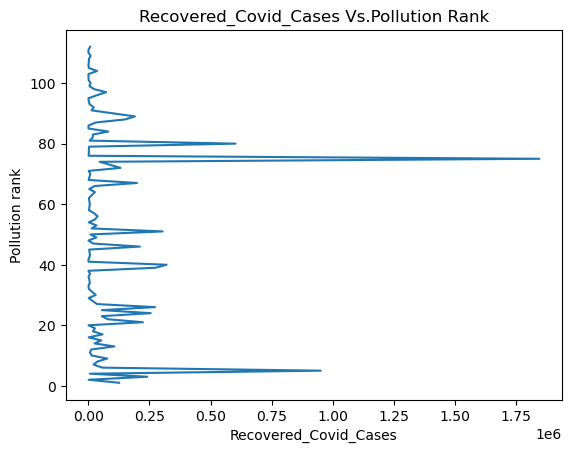

In [280]:
# Line plot

## Line plot function

def Line_plot(data_x, data_y, title, xlabel, ylabel, filename):
    plt.plot(data_x,data_y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

### Line plot for Confirmed Covid Cases Vs.Pollution Rank

Line_plot(covid_air_pollution_df["Confirmed_Covid_Cases"],
              covid_air_pollution_df["Pollution Rank"],
              "Confirmed Covid Cases Vs.Pollution Rank ",
              "Confirmed Covid Cases",
              "Pollution Rank",
              " Confirmed Covid Cases Vs.Pollution Rank.png")

### Line plot for Deaths Vs.Pollution Rank


Line_plot(covid_air_pollution_df["Deaths"],
              covid_air_pollution_df["Pollution Rank"],
              "Deaths Vs.Pollution Rank",
              "Deaths",
              "Pollution Rank",
              "Deaths Vs.Pollution rank.png")

### Line plot for Recovered_Covid_Cases Vs.Pollution Rank

Line_plot(covid_air_pollution_df["Recovered_Covid_Cases"],
              covid_air_pollution_df["Pollution Rank"],
              "Recovered_Covid_Cases Vs.Pollution Rank",
              "Recovered_Covid_Cases",
              "Pollution rank",
              "Recovered_Covid_Cases Vs.Pollution Rank.png")
    

In [ ]:
# country_mapping_df_fix = country_mapping_df.rename(columns={"location": "Country/Region"})
# air_pollution_df=pd.merge(air_pollution_df,country_mapping_df_fix,on="Country/Region",how="left")
# air_pollution_df

,Rank,Country/Region,2021,2020,2019,2018,Population,Continent
0,1,Bangladesh,76.9,77.1,83.3,97.1,164689383,Asia
1,2,Chad,75.9,-,-,-,16425859,Africa
2,3,Pakistan,66.8,59,65.8,74.3,220892331,Asia
3,4,Tajikistan,59.4,30.9,-,-,9537642,Asia
4,5,India,58.1,51.9,58.1,72.5,1380004385,Africa
...,...,...,...,...,...,...,...,...
112,113,"Bonaire, Saint Eustatius and Saba",5.1,-,-,-,26221,NaN
113,114,Cape Verde,5.1,-,-,-,555988,Africa
114,115,Puerto Rico,4.8,3.7,10.2,13.7,2860840,Americas
115,116,U.S. Virgin Islands,4.5,3.7,3.5,-,104423,NaN


2. Air Quality and Water Pollution Data Vs.Covid Data

In [331]:
# Merge and reset Datasets

# # trim the headers, delete the spaces
air_quality_df=air_quality_df.rename(columns=lambda x: x.strip())

# # trim the Country data, delete the spaces
air_quality_df["Country"] = air_quality_df['Country'].str.strip()
air_quality_df=air_quality_df.rename(columns={"Country":"Country/Region"})

## Summarize datas   
                                    
summary_air_quality_df=air_quality_df.groupby(["Country/Region"]).sum()


summary_covid_complete_df=covid_complete_df.groupby(["Country/Region"]).sum()


## Merge datas
merge_df=pd.merge(summary_covid_complete_df,summary_air_quality_df,on="Country/Region",how='inner')

## Drop unnessassry columns

covid_air_quality_df=merge_df[["Confirmed",
                                "Deaths",
                                "Recovered",
                                "AirQuality",
                                "WaterPollution"]]
covid_air_quality_df


,Confirmed,Deaths,Recovered,AirQuality,WaterPollution
Country/Region,,,,,
Afghanistan,1936390,49098,798240,223.282164,320.643939
Albania,196702,5708,118877,622.483498,694.010417
Algeria,1179755,77972,755897,979.326923,860.591737
Andorra,94404,5423,69074,87.500000,50.000000
Angola,22662,1078,6573,15.000000,81.250000
...,...,...,...,...,...
Venezuela,412231,4101,151542,365.145089,785.496368
Vietnam,40675,0,32838,267.344657,393.161506
Yemen,67180,17707,23779,158.333333,341.666667


The r-value for vaccination rate vs death rate is: 0.5698388819424719
The r-value for vaccination rate vs death rate is: 0.632017188905695
The r-value for vaccination rate vs death rate is: 0.45205560225684976


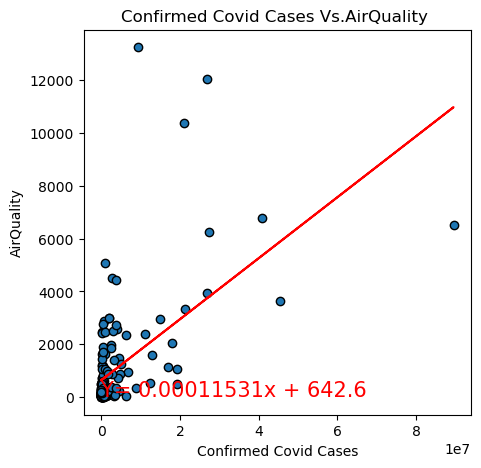

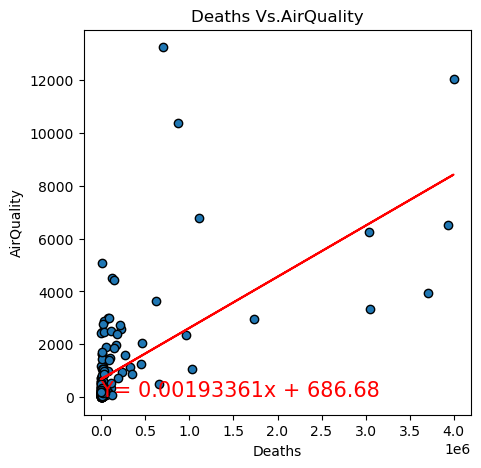

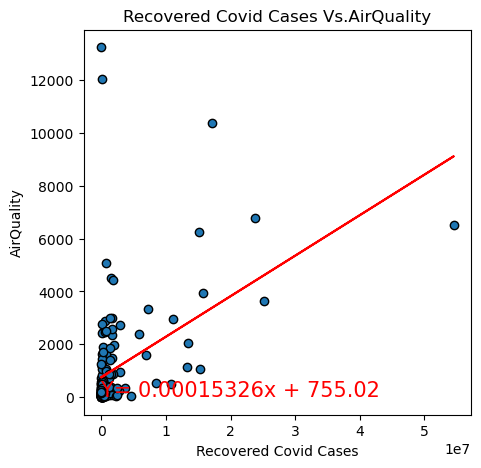

In [334]:
# Scatter plot + linear regression for air quality

## Scatter plot + linear regression function 

def Linear_R_plot(data_x, data_y, title, xlabel, ylabel, filename):
    plt.figure(figsize=(5,5))
    plt.tight_layout()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    

    plt.scatter(data_x,data_y,marker="o",edgecolors="black")

    ## Add linear regression

    (slope, intercept, rvalues, pvalue, stderr) = st.linregress(data_x, data_y)
    regress_values = data_x * slope + intercept
    line_eq = "Y= " + str(round(slope,8)) + "x + " + str(round(intercept,2))
    print("The r-value for vaccination rate vs death rate is: " + str(rvalues))
    plt.plot(data_x, regress_values, "r-")
    plt.annotate(line_eq, xy=(5,22),fontsize = 15, color = "red")
    plt.savefig(filename)

##Scatter plot + linear regression for Confirmed Vs.AirQuality

Linear_R_plot(covid_air_quality_df["Confirmed"],
              covid_air_quality_df["AirQuality"],
              "Confirmed Covid Cases Vs.AirQuality ",
              "Confirmed Covid Cases",
              "AirQuality",
              "Confirmed Covid Cases Vs.AirQuality.png")


##Scatter plot + linear regression for Death Vs.AirQuality

Linear_R_plot(covid_air_quality_df["Deaths"],
              covid_air_quality_df["AirQuality"],
              "Deaths Vs.AirQuality",
              "Deaths",
              "AirQuality",
              "Deaths Vs.AirQuality.png")

##Scatter plot + linear regression for Recovered Vs.AirQuality

Linear_R_plot(covid_air_quality_df["Recovered"],
              covid_air_quality_df["AirQuality"],
              "Recovered Covid Cases Vs.AirQuality",
              "Recovered Covid Cases",
              "AirQuality",
              "Recovered Covid Cases Vs.AirQuality.png")

The r-value for vaccination rate vs death rate is: 0.7350542781028273
The r-value for vaccination rate vs death rate is: 0.5824229368382661
The r-value for vaccination rate vs death rate is: 0.6705506047269921


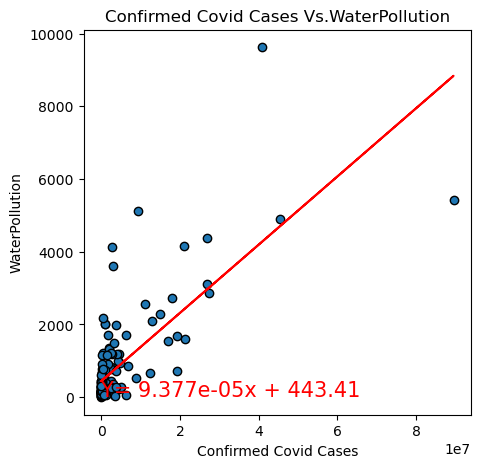

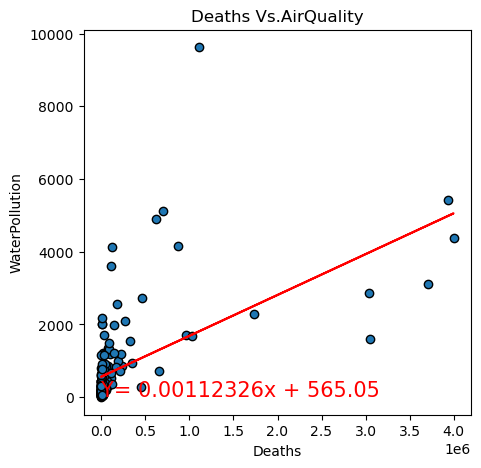

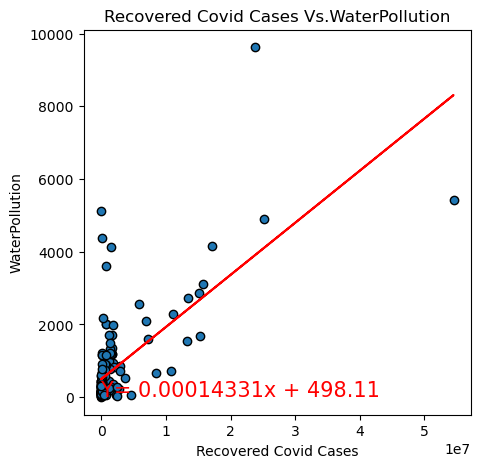

In [333]:
# Scatter plot + linear regression for water pollution

##Scatter plot + linear regression function

def Linear_R_plot(data_x, data_y, title, xlabel, ylabel, filename):
    plt.figure(figsize=(5,5))
    plt.tight_layout()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


    plt.scatter(data_x,data_y,marker="o",edgecolors="black")

    ## Add linear regression

    (slope, intercept, rvalues, pvalue, stderr) = st.linregress(data_x, data_y)
    regress_values = data_x * slope + intercept
    line_eq = "Y= " + str(round(slope,8)) + "x + " + str(round(intercept,2))
    print("The r-value for vaccination rate vs death rate is: " + str(rvalues))
    plt.plot(data_x, regress_values, "r-")
    plt.annotate(line_eq, xy=(5,22),fontsize = 15, color = "red")
    plt.savefig(filename)

##Scatter plot + linear regression for Confirmed Vs.WaterPollution

Linear_R_plot(covid_air_quality_df["Confirmed"],
              covid_air_quality_df["WaterPollution"],
              "Confirmed Covid Cases Vs.WaterPollution",
              "Confirmed Covid Cases",
              "WaterPollution",
              "Confirmed Covid Cases Vs.WaterPollution.png")

##Scatter plot + linear regression for Death Vs.WaterPollution

Linear_R_plot(covid_air_quality_df["Deaths"],
              covid_air_quality_df["WaterPollution"],
              "Deaths Vs.AirQuality",
              "Deaths",
              "WaterPollution",
              "Deaths Vs.WaterPollution.png")

##Scatter plot + linear regression for Recovered Vs.WaterPollution

Linear_R_plot(covid_air_quality_df["Recovered"],
              covid_air_quality_df["WaterPollution"],
              "Recovered Covid Cases Vs.WaterPollution",
              "Recovered Covid Cases",
              "WaterPollution",
              "Recovered Covid Cases Vs.WaterPollution.png")

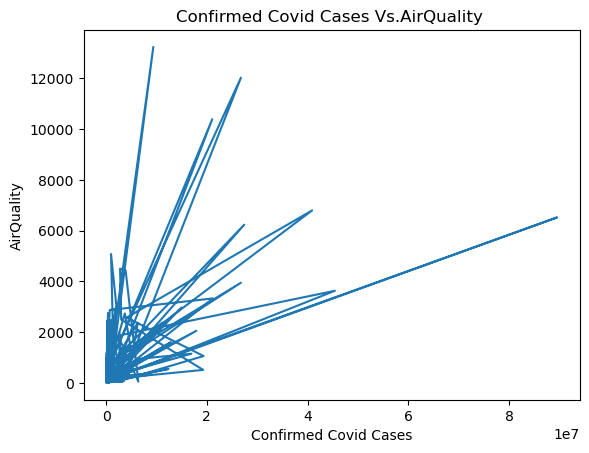

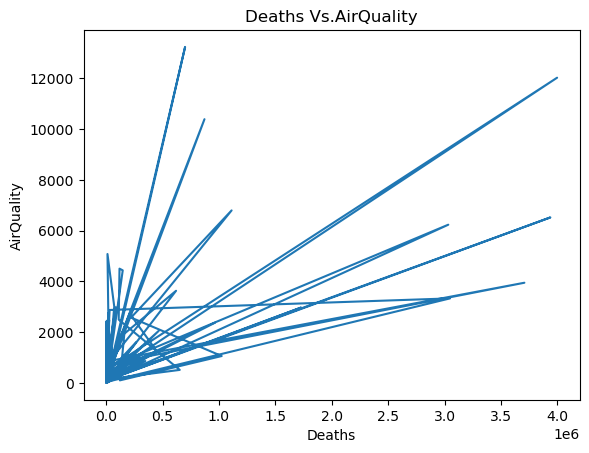

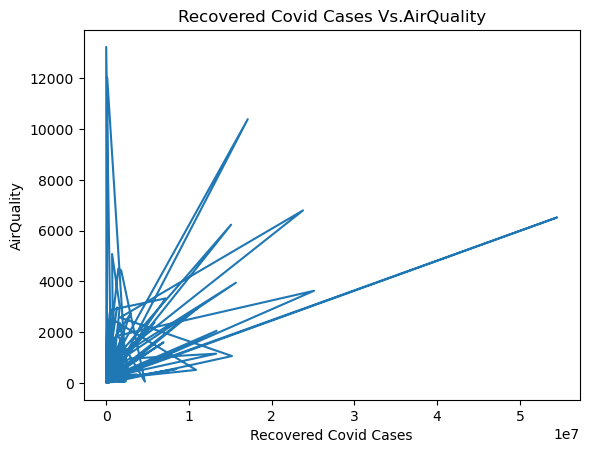

In [335]:
# Line plot for air quality

## line plot function

def line_plot(data_x, data_y, title, xlabel, ylabel, filename):
    plt.plot(data_x,data_y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

#Line plot for Confirmed Covid Cases Vs.AirQuality

line_plot(covid_air_quality_df["Confirmed"],
              covid_air_quality_df["AirQuality"],
              "Confirmed Covid Cases Vs.AirQuality ",
              "Confirmed Covid Cases",
              "AirQuality",
              "Confirmed Covid Cases Vs.AirQuality.png")

#Line plot for Deaths Vs.AirQuality

line_plot(covid_air_quality_df["Deaths"],
              covid_air_quality_df["AirQuality"],
              "Deaths Vs.AirQuality",
              "Deaths",
              "AirQuality",
              "Deaths Vs.AirQuality.png")

#Line plot for Recovered cases Vs.AirQuality

line_plot(covid_air_quality_df["Recovered"],
              covid_air_quality_df["AirQuality"],
              "Recovered Covid Cases Vs.AirQuality",
              "Recovered Covid Cases",
              "AirQuality",
              "Recovered Covid Cases Vs.AirQuality.png")

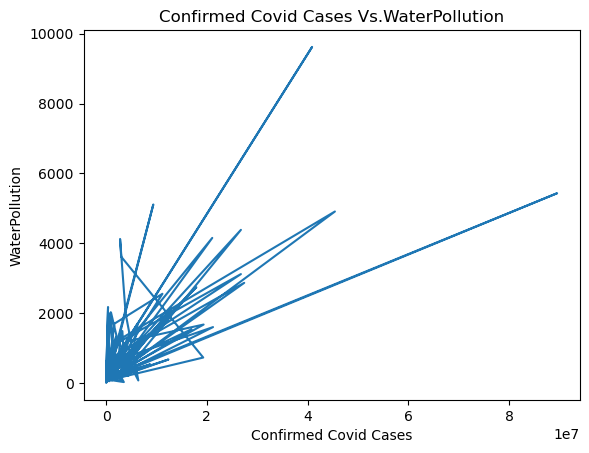

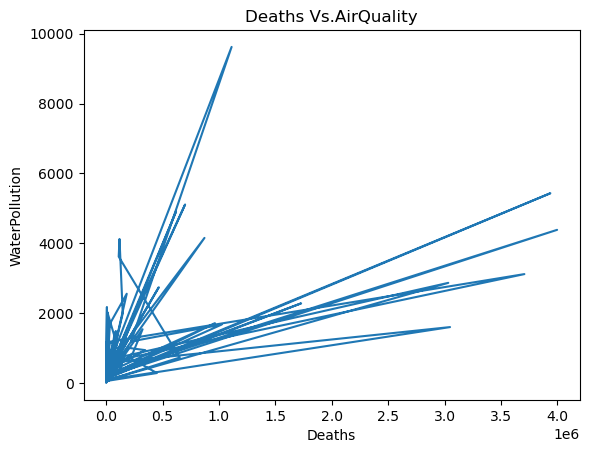

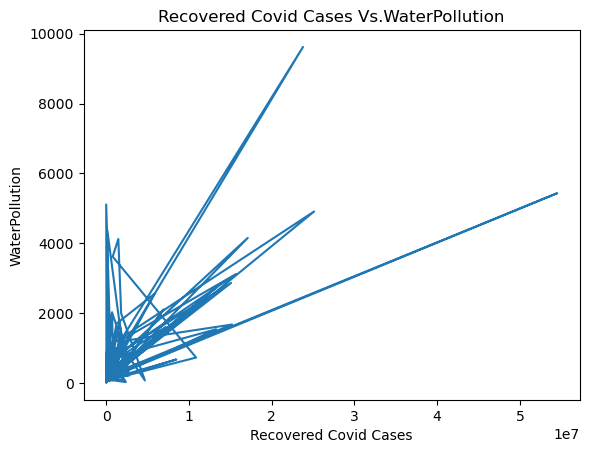

In [336]:
# Line plot for Water Pollution

## line plot function

def line_plot(data_x, data_y, title, xlabel, ylabel, filename):
    plt.plot(data_x,data_y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

## Line plot for Confirmed Covid Cases Vs.WaterPollution

line_plot(covid_air_quality_df["Confirmed"],
              covid_air_quality_df["WaterPollution"],
              "Confirmed Covid Cases Vs.WaterPollution",
              "Confirmed Covid Cases",
              "WaterPollution",
              "Confirmed Covid Cases Vs.WaterPollution.png")

## Line plot for Confirmed Death Vs.WaterPollution

line_plot(covid_air_quality_df["Deaths"],
              covid_air_quality_df["WaterPollution"],
              "Deaths Vs.AirQuality",
              "Deaths",
              "WaterPollution",
              "Deaths Vs.WaterPollution.png")

## Line plot for Recovered Covid Cases Vs.WaterPollution

line_plot(covid_air_quality_df["Recovered"],
              covid_air_quality_df["WaterPollution"],
              "Recovered Covid Cases Vs.WaterPollution",
              "Recovered Covid Cases",
              "WaterPollution",
              "Recovered Covid Cases Vs.WaterPollution.png")